In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import statistics

In [5]:
df_gd=pd.read_csv('Glassdoor Gender Pay Gap.csv')

# Display the data with some basic statistics

In [6]:
df_gd

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


In [7]:
df_gd.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [8]:
df_gd[df_gd.isnull().any(axis=1)]
# no null values, no NaN values

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus


In [9]:
df_gd.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


### number of males and females in the sample 

In [10]:
len(df_gd[df_gd['Gender']=='Male'])

532

In [11]:
len(df_gd[df_gd['Gender']=='Female'])

468

### nr and name of unique job, education and department categories

In [12]:

df_gd["JobTitle"].nunique()

10

In [13]:
# nr and name of unique job categories
df_gd["JobTitle"].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [14]:
df_gd["Education"].unique()

array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

In [15]:
df_gd["Education"].nunique()

4

In [16]:
df_gd["Dept"].nunique()

5

In [17]:
df_gd["Dept"].unique()

array(['Operations', 'Management', 'Administration', 'Sales',
       'Engineering'], dtype=object)

### statistics on age, job title, education and department categories

<AxesSubplot:xlabel='Age', ylabel='Count'>

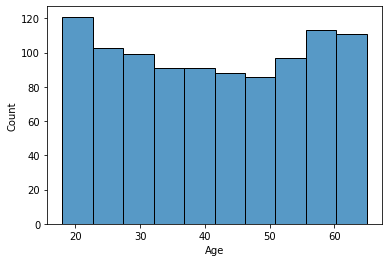

In [18]:
sns.histplot(df_gd["Age"], bins=10)

In [19]:
df_gd["Age"].min()

18

In [20]:
df_gd["Age"].max()

65

In [21]:
df_gd

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


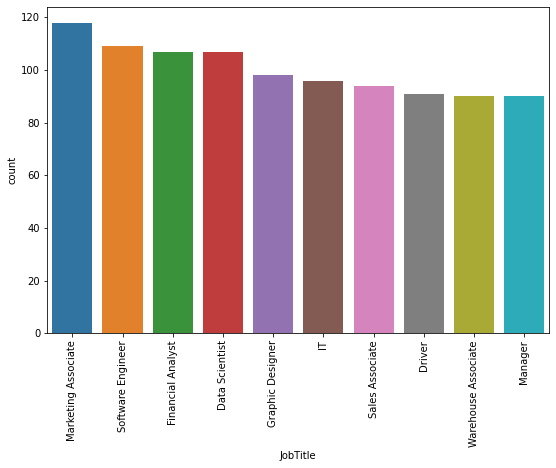

In [22]:
plt.figure(figsize = (9,6))
ax = sns.countplot(x = 'JobTitle',  order = df_gd['JobTitle'].value_counts().index, data = df_gd)
plt.xticks(rotation=90)
plt.show()

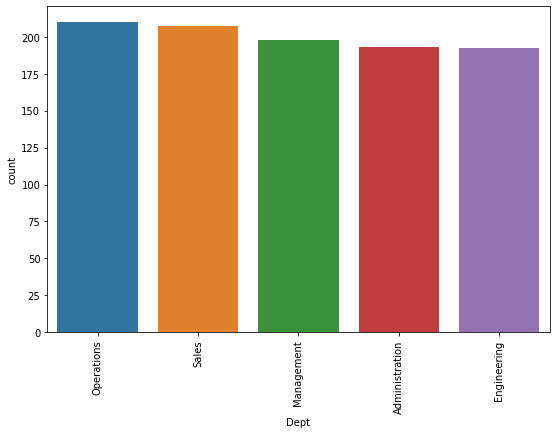

In [23]:
plt.figure(figsize = (9,6))
ax = sns.countplot(x = 'Dept',  order = df_gd['Dept'].value_counts().index, data = df_gd)
plt.xticks(rotation=90)
plt.show()

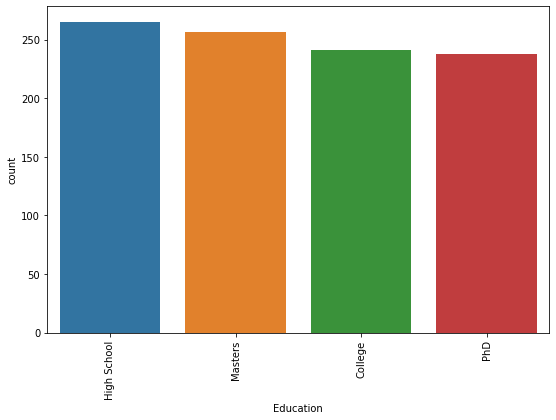

In [24]:
plt.figure(figsize = (9,6))
ax = sns.countplot(x = 'Education',  order = df_gd['Education'].value_counts().index, data = df_gd)
plt.xticks(rotation=90)
plt.show()

In [25]:
# roughly equal number of people regarding education and department. Age distribution is skewed towards the youngest and oldest

<AxesSubplot:xlabel='PerfEval', ylabel='Count'>

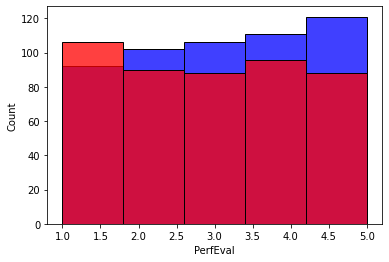

In [26]:
sns.histplot(df_gd[df_gd["Gender"]=='Male']["PerfEval"], bins=5, color='blue')
sns.histplot(df_gd[df_gd["Gender"]=='Female']["PerfEval"], bins=5, color='red')

In [27]:
df_gd["Education"].unique()

array(['College', 'PhD', 'Masters', 'High School'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='Count'>

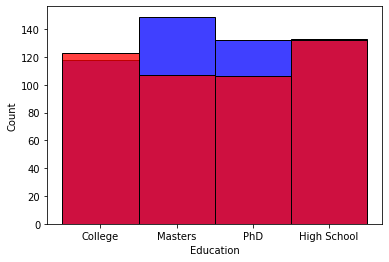

In [28]:
sns.histplot(df_gd[df_gd["Gender"]=='Male']["Education"], bins=5, color='blue')
sns.histplot(df_gd[df_gd["Gender"]=='Female']["Education"], bins=5, color='red')

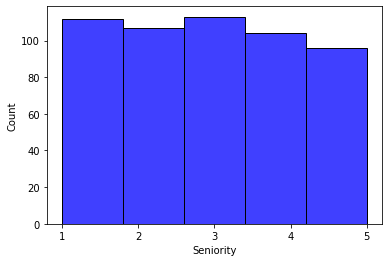

In [80]:
sns.histplot(df_gd[df_gd["Gender"]=='Male']["Seniority"], bins=5, color='blue')
plt.xticks([1,2,3,4,5])
plt.show()


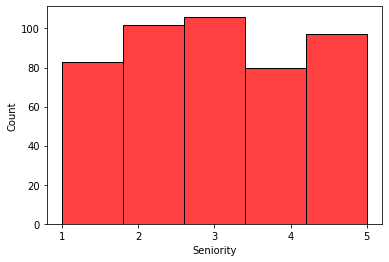

In [81]:
sns.histplot(df_gd[df_gd["Gender"]=='Female']["Seniority"], bins=5, color='red')
plt.xticks([1,2,3,4,5])
plt.show()

# Showing the most important pairplots

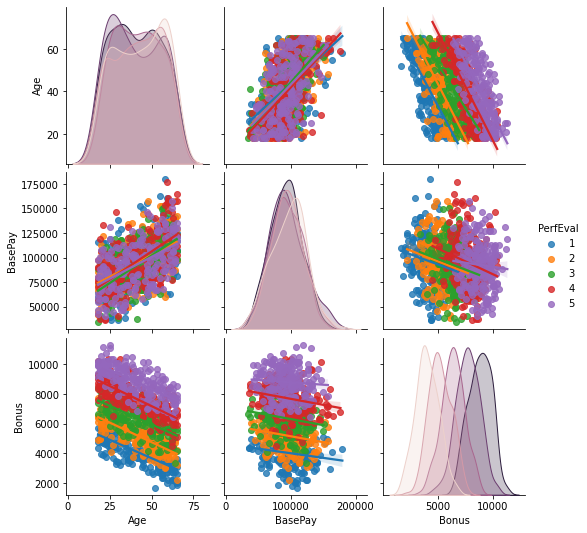

In [31]:
sns.pairplot(df_gd, vars=['Age', 'BasePay', 'Bonus'], kind='reg', hue = 'PerfEval')

In [ ]:
# observation: bonus correlates well with age if grouped by PerfEval scores

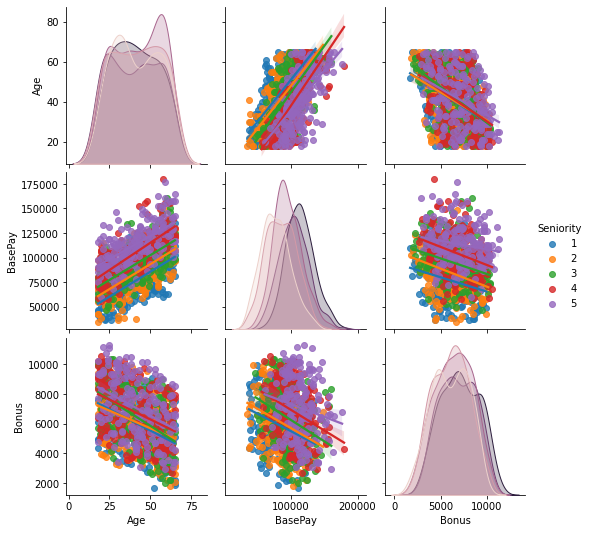

In [32]:
sns.pairplot(df_gd, vars=['Age', 'BasePay', 'Bonus'], kind='reg', hue = 'Seniority')

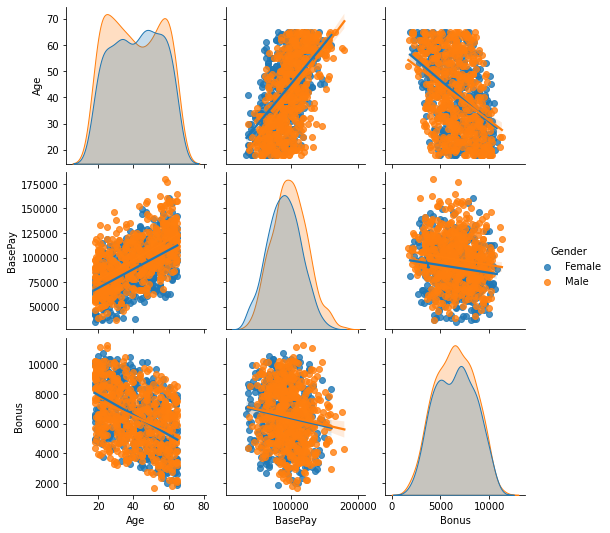

In [33]:
sns.pairplot(df_gd, vars=['Age', 'BasePay', 'Bonus'], kind='reg', hue = 'Gender')

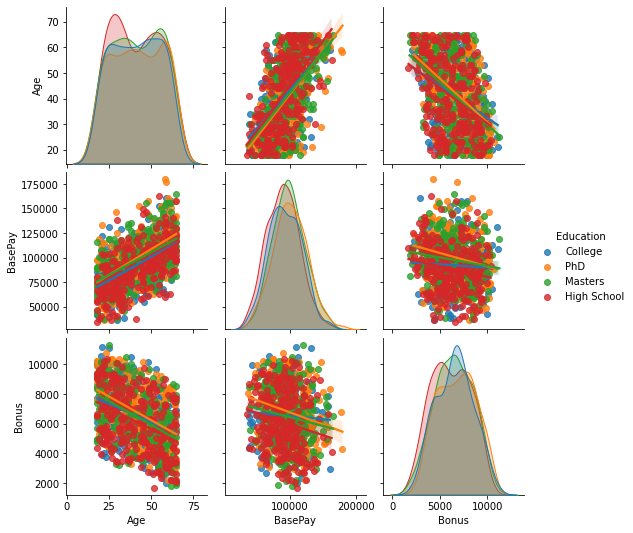

In [34]:
sns.pairplot(df_gd, vars=['Age', 'BasePay', 'Bonus'], kind='reg', hue = 'Education')

In [35]:
# How does pay change with gender on different seniority levels? 
# Guess: no difference on lower seniority levels, difference at higher seniority levels

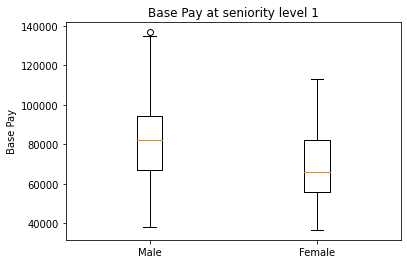

Ttest_indResult(statistic=4.197697210644173, pvalue=4.11235704715549e-05)


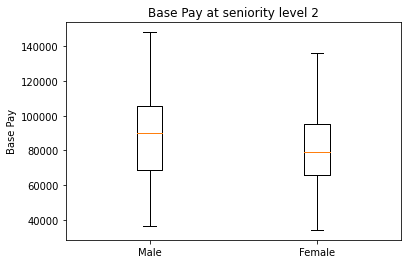

Ttest_indResult(statistic=3.2305280976612627, pvalue=0.0014373203082345101)


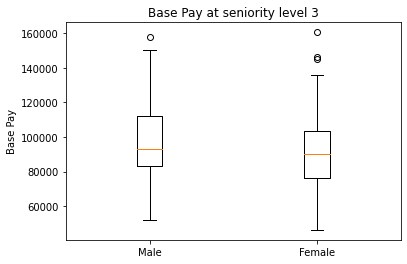

Ttest_indResult(statistic=2.3270355846114428, pvalue=0.0208851773317118)


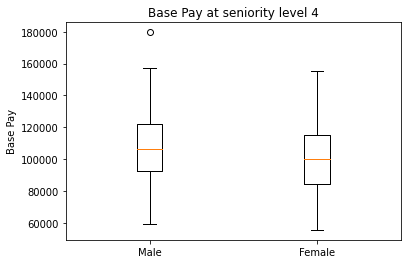

Ttest_indResult(statistic=2.624961035646701, pvalue=0.009402706200366739)


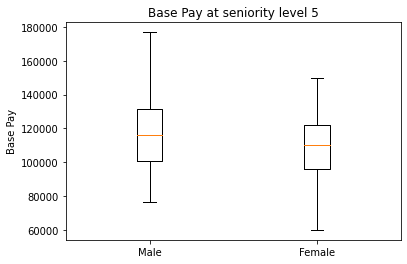

Ttest_indResult(statistic=2.9089274740843227, pvalue=0.0040568177656499435)


In [36]:
for k in range(1,6):
    df_gd_s=df_gd[df_gd['Seniority']==k]
    df_gd_s_m=df_gd_s[df_gd_s['Gender']=='Male']
    df_gd_s_f=df_gd_s[df_gd_s['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_s_m['BasePay'], df_gd_s_f['BasePay']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Base Pay at seniority level {}".format(k))
    ax.set_ylabel('Base Pay')
    plt.show()
    print(stats.ttest_ind(df_gd_s_m['BasePay'], df_gd_s_f['BasePay']))

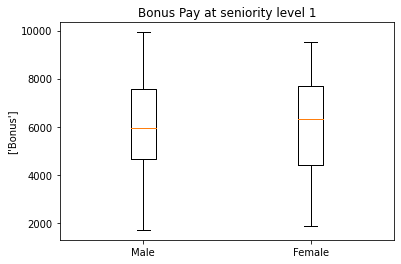

Ttest_indResult(statistic=-0.07376692962238403, pvalue=0.9412722384968656)


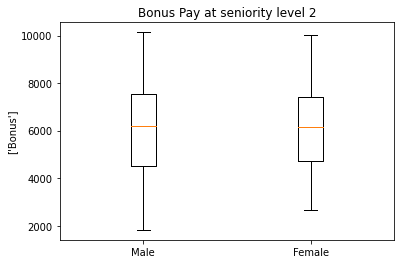

Ttest_indResult(statistic=-0.3323984187455547, pvalue=0.7399247912770214)


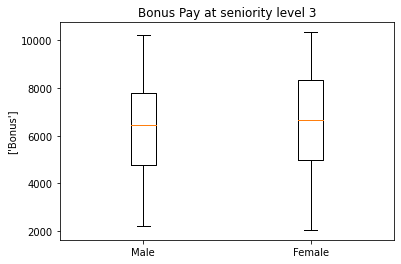

Ttest_indResult(statistic=-0.42527517397892894, pvalue=0.6710575171342004)


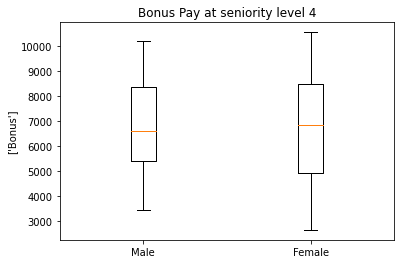

Ttest_indResult(statistic=0.5549400510783418, pvalue=0.5796170401878937)


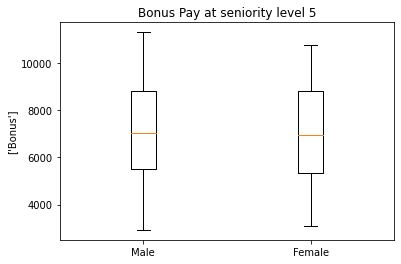

Ttest_indResult(statistic=0.3685443906765344, pvalue=0.7128755161162877)


In [37]:
for k in range(1,6):
    df_gd_s=df_gd[df_gd['Seniority']==k]
    df_gd_s_m=df_gd_s[df_gd_s['Gender']=='Male']
    df_gd_s_f=df_gd_s[df_gd_s['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_s_m['Bonus'], df_gd_s_f['Bonus']])
    ax.set_xticklabels(['Male', 'Female'])
    ax.set_ylabel(['Bonus'])
    plt.title("Bonus Pay at seniority level {}".format(k))
    plt.show()
    print(stats.ttest_ind(df_gd_s_m['Bonus'], df_gd_s_f['Bonus']))

In [38]:
df_gd['TotalPay']=df_gd['Bonus']+df_gd['BasePay']
df_gd

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


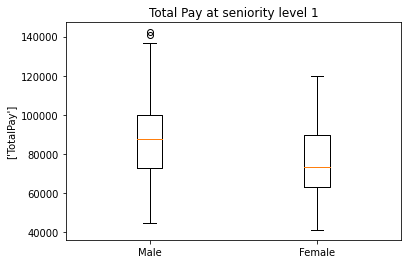

Ttest_indResult(statistic=4.281388479558313, pvalue=2.924422612475403e-05)


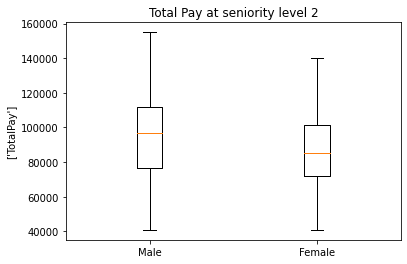

Ttest_indResult(statistic=3.2783451373045196, pvalue=0.001224727764151847)


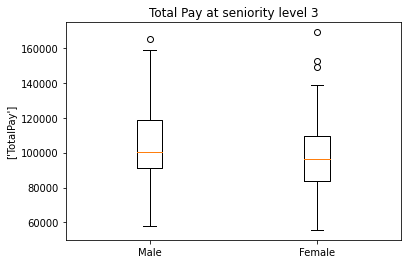

Ttest_indResult(statistic=2.3437911412584733, pvalue=0.01999287004818888)


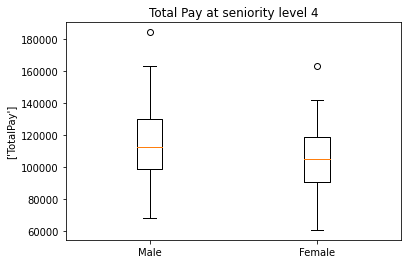

Ttest_indResult(statistic=2.7444572762266466, pvalue=0.006668407930704005)


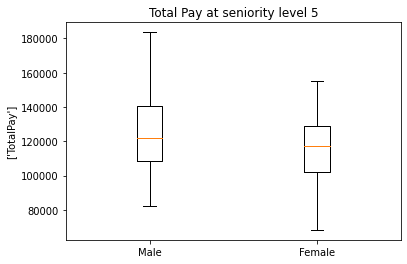

Ttest_indResult(statistic=2.985422836747278, pvalue=0.003202481852427575)


In [39]:
for k in range(1,6):
    df_gd_s=df_gd[df_gd['Seniority']==k]
    df_gd_s_m=df_gd_s[df_gd_s['Gender']=='Male']
    df_gd_s_f=df_gd_s[df_gd_s['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_s_m['TotalPay'], df_gd_s_f['TotalPay']])
    ax.set_xticklabels(['Male', 'Female'])
    ax.set_ylabel(['TotalPay'])
    plt.title("Total Pay at seniority level {}".format(k))
    plt.show()
    print(stats.ttest_ind(df_gd_s_m['TotalPay'], df_gd_s_f['TotalPay']))


### Base Pay differs significantly for men and women in every seniority level; strongest difference at entry level
### Bonus does not differ significantly for men and women in any seniority level
### Total Pay differs significantly for men and women in every seniority level; strongest difference at entry level

## 
##
## How does pay change with gender in different jobs? 


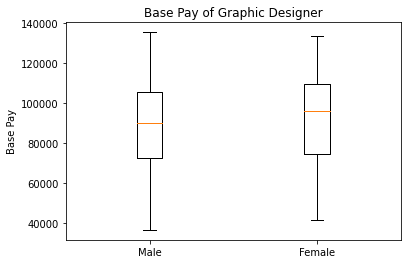

Ttest_indResult(statistic=-0.5702068792367077, pvalue=0.5698695145828447)


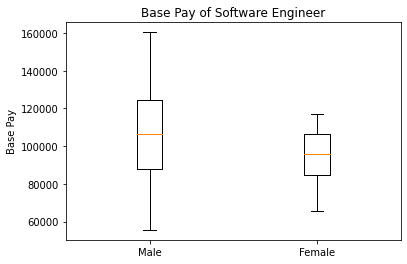

Ttest_indResult(statistic=1.2954816935840678, pvalue=0.1979420198727571)


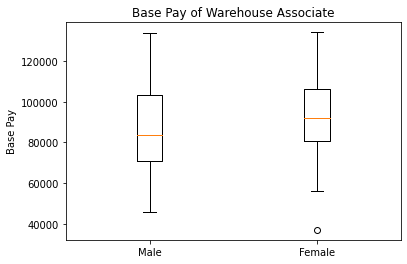

Ttest_indResult(statistic=-1.3377591361821422, pvalue=0.18442195428131758)


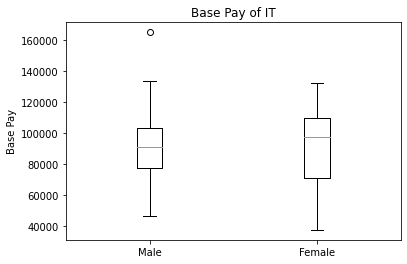

Ttest_indResult(statistic=0.10887980928243958, pvalue=0.9135299096257539)


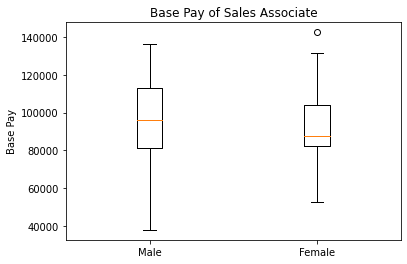

Ttest_indResult(statistic=0.5873185429584347, pvalue=0.5584284724250893)


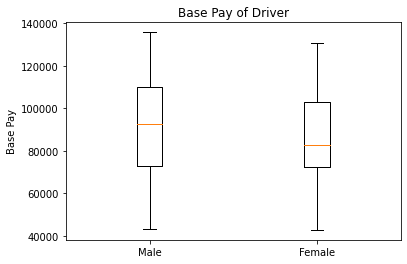

Ttest_indResult(statistic=1.1259497536555114, pvalue=0.26321380022011254)


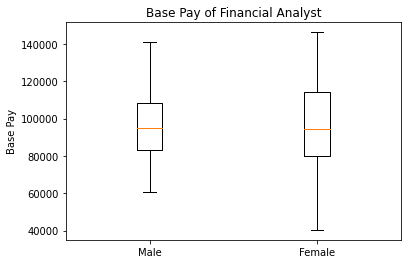

Ttest_indResult(statistic=-0.20649193457773013, pvalue=0.836806544030908)


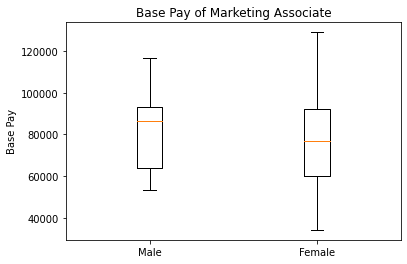

Ttest_indResult(statistic=0.8471690249440619, pvalue=0.3986453902694107)


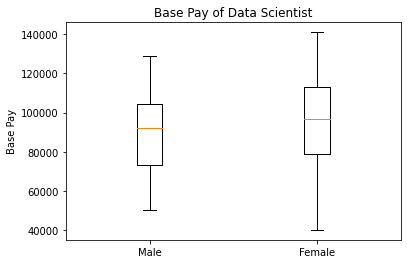

Ttest_indResult(statistic=-1.487294767358199, pvalue=0.13993387910103716)


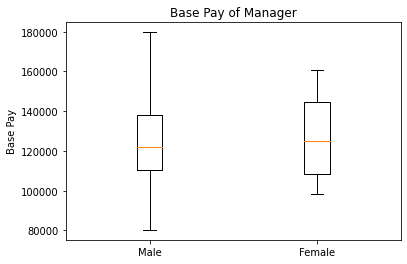

Ttest_indResult(statistic=-0.4293012845232649, pvalue=0.6687532200881279)


In [40]:
for job in df_gd["JobTitle"].unique():
    df_gd_j=df_gd[df_gd['JobTitle']==job]
    df_gd_j_m=df_gd_j[df_gd_j['Gender']=='Male']
    df_gd_j_f=df_gd_j[df_gd_j['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_j_m['BasePay'], df_gd_j_f['BasePay']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Base Pay of {}".format(job))
    ax.set_ylabel('Base Pay')
    plt.show()
    print(stats.ttest_ind(df_gd_j_m['BasePay'], df_gd_j_f['BasePay']))

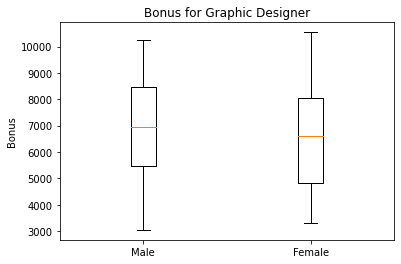

Ttest_indResult(statistic=1.0499999731694591, pvalue=0.2963542170940845)


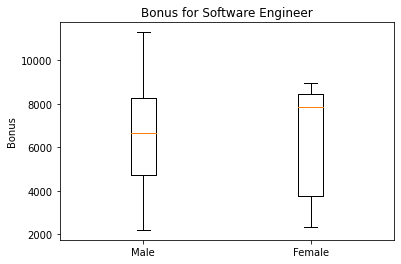

Ttest_indResult(statistic=0.2644980744346043, pvalue=0.7919049563808856)


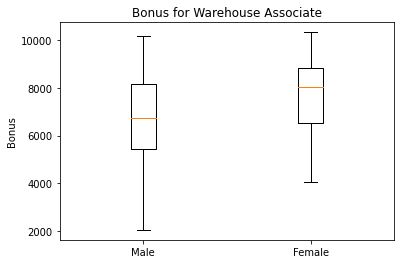

Ttest_indResult(statistic=-2.199784130540551, pvalue=0.030442691592780943)


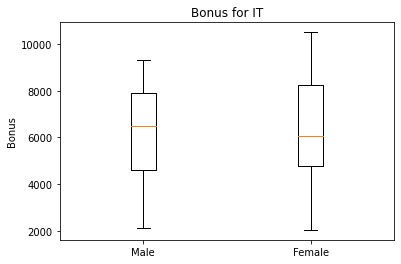

Ttest_indResult(statistic=-0.32404481922058737, pvalue=0.7466240246908074)


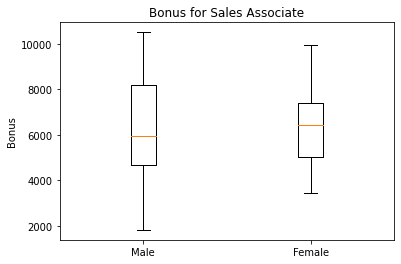

Ttest_indResult(statistic=-0.2337975459347917, pvalue=0.8156616162439935)


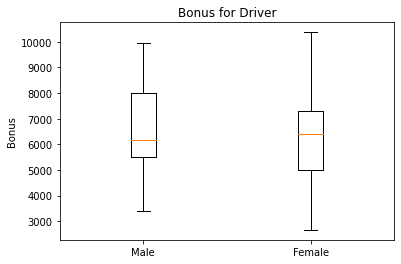

Ttest_indResult(statistic=0.3611799907751664, pvalue=0.7188208582481806)


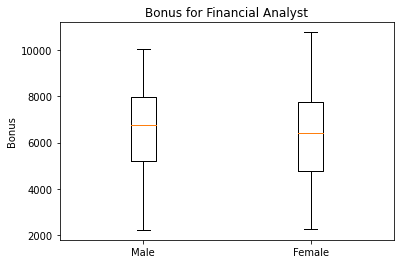

Ttest_indResult(statistic=0.5648588997001376, pvalue=0.5733745743374882)


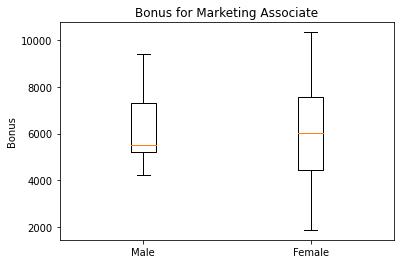

Ttest_indResult(statistic=0.23972696002973629, pvalue=0.8109650244177586)


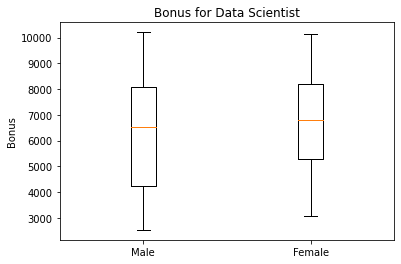

Ttest_indResult(statistic=-1.3243928008600203, pvalue=0.1882481667832371)


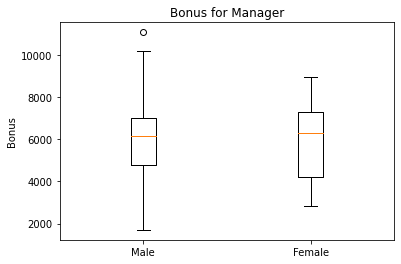

Ttest_indResult(statistic=0.18906901204543405, pvalue=0.8504741070449617)


In [41]:
for job in df_gd["JobTitle"].unique():
    df_gd_j=df_gd[df_gd['JobTitle']==job]
    df_gd_j_m=df_gd_j[df_gd_j['Gender']=='Male']
    df_gd_j_f=df_gd_j[df_gd_j['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_j_m['Bonus'], df_gd_j_f['Bonus']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Bonus for {}".format(job))
    ax.set_ylabel('Bonus')
    plt.show()
    print(stats.ttest_ind(df_gd_j_m['Bonus'], df_gd_j_f['Bonus']))

In [42]:
#take-home message: only for the bonus pay warehouse asociates is there a slightly significant difference in the salary of males and females

## 
##
## How does pay change with gender with different educational background? 




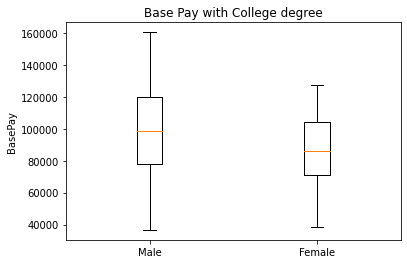

Ttest_indResult(statistic=3.824742737375141, pvalue=0.00016710935117356858)


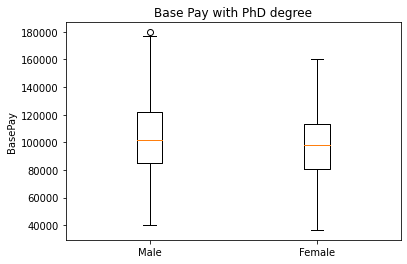

Ttest_indResult(statistic=1.8439721214459537, pvalue=0.06644073496268824)


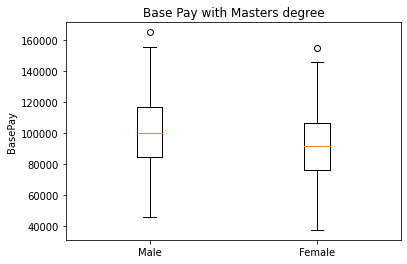

Ttest_indResult(statistic=2.8371174005777178, pvalue=0.004919531894087041)


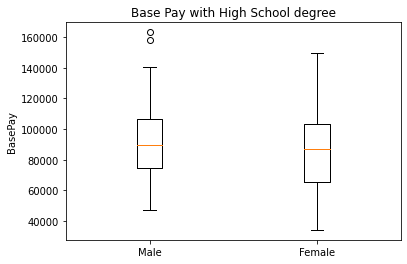

Ttest_indResult(statistic=1.783466065491884, pvalue=0.07566354721400056)


In [43]:
for educ in df_gd["Education"].unique():
    df_gd_e=df_gd[df_gd['Education']==educ]
    df_gd_e_m=df_gd_e[df_gd_e['Gender']=='Male']
    df_gd_e_f=df_gd_e[df_gd_e['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_e_m['BasePay'], df_gd_e_f['BasePay']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Base Pay with {} degree".format(educ))
    ax.set_ylabel('BasePay')
    plt.show()
    print(stats.ttest_ind(df_gd_e_m['BasePay'], df_gd_e_f['BasePay']))

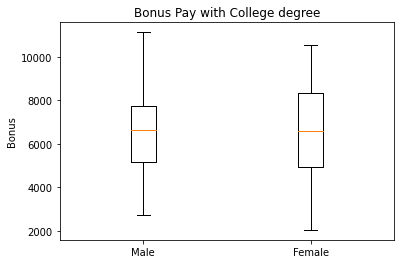

Ttest_indResult(statistic=-0.6840936210200093, pvalue=0.4945788124154529)


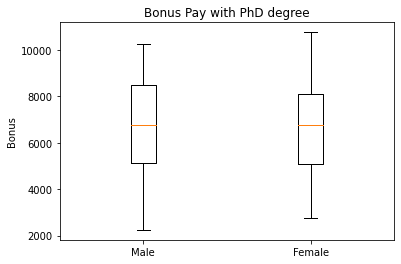

Ttest_indResult(statistic=0.7956758011286926, pvalue=0.4270200625016556)


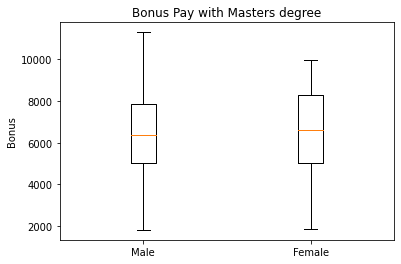

Ttest_indResult(statistic=-0.28820662272159153, pvalue=0.773423617737414)


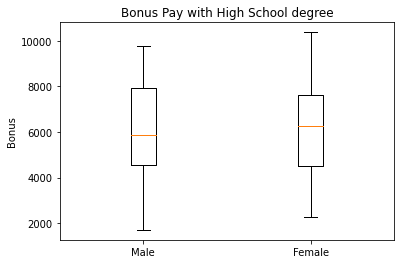

Ttest_indResult(statistic=-0.22813203916860103, pvalue=0.8197208600900284)


In [44]:
for educ in df_gd["Education"].unique():
    df_gd_e=df_gd[df_gd['Education']==educ]
    df_gd_e_m=df_gd_e[df_gd_e['Gender']=='Male']
    df_gd_e_f=df_gd_e[df_gd_e['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_e_m['Bonus'], df_gd_e_f['Bonus']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Bonus Pay with {} degree".format(educ))
    ax.set_ylabel('Bonus')
    plt.show()
    print(stats.ttest_ind(df_gd_e_m['Bonus'], df_gd_e_f['Bonus']))

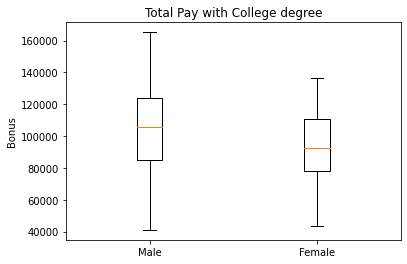

Ttest_indResult(statistic=3.770523806779675, pvalue=0.0002053659637753427)


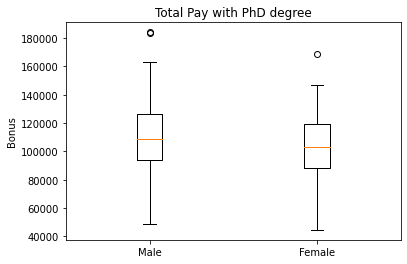

Ttest_indResult(statistic=1.932722530529716, pvalue=0.054466987195064584)


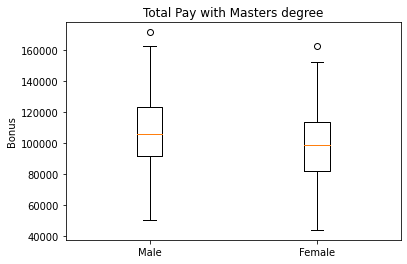

Ttest_indResult(statistic=2.8374252156086652, pvalue=0.004914938883202449)


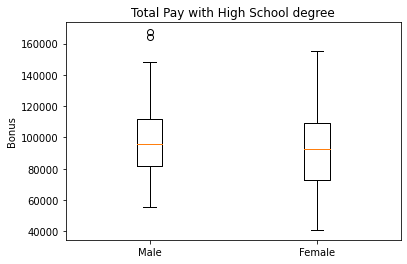

Ttest_indResult(statistic=1.7851733987036489, pvalue=0.07538555593407435)


In [45]:
for educ in df_gd["Education"].unique():
    df_gd_e=df_gd[df_gd['Education']==educ]
    df_gd_e_m=df_gd_e[df_gd_e['Gender']=='Male']
    df_gd_e_f=df_gd_e[df_gd_e['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_e_m['TotalPay'], df_gd_e_f['TotalPay']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Total Pay with {} degree".format(educ))
    ax.set_ylabel('Bonus')
    plt.show()
    print(stats.ttest_ind(df_gd_e_m['TotalPay'], df_gd_e_f['TotalPay']))

In [46]:
#Conclusion: there is a significant pay gap between males and females in the base salary on the college and masters level - women earn less. There si no significant difference in the bonus on neitehr levels, whereas there is a significant difference (women earn less) for all educational levels. 

## 
##
## How does pay change with gender in different evaluations? 


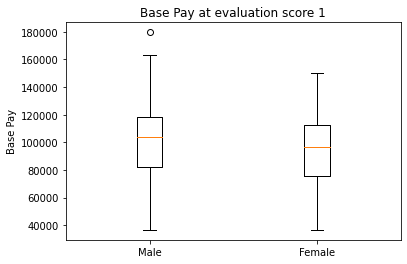

Ttest_indResult(statistic=1.9096903668798075, pvalue=0.05763338040359602)


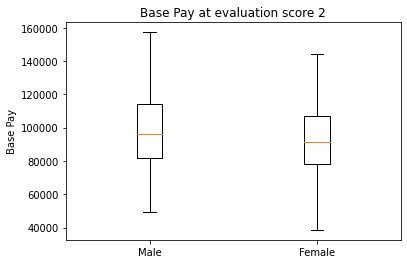

Ttest_indResult(statistic=1.7808802950406213, pvalue=0.07652974339148724)


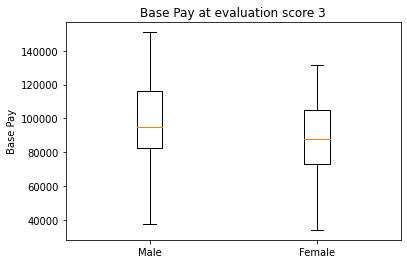

Ttest_indResult(statistic=2.935376092754726, pvalue=0.0037381029656015957)


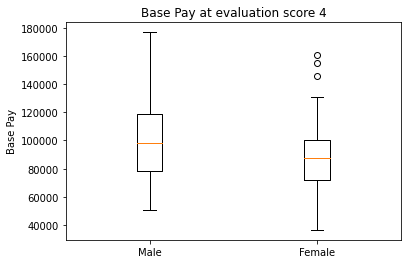

Ttest_indResult(statistic=3.434355597438017, pvalue=0.0007187360599210726)


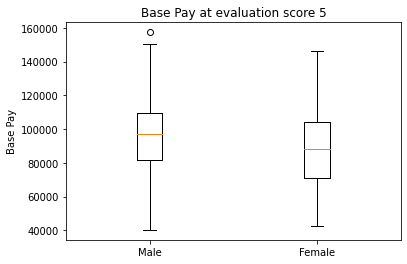

Ttest_indResult(statistic=2.297496159393269, pvalue=0.02258997810603424)


In [47]:
for k in range(1,6):
    df_gd_p=df_gd[df_gd['PerfEval']==k]
    df_gd_p_m=df_gd_p[df_gd_p['Gender']=='Male']
    df_gd_p_f=df_gd_p[df_gd_p['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_p_m['BasePay'], df_gd_p_f['BasePay']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Base Pay at evaluation score {}".format(k))
    ax.set_ylabel('Base Pay')
    plt.show()
    print(stats.ttest_ind(df_gd_p_m['BasePay'], df_gd_p_f['BasePay']))

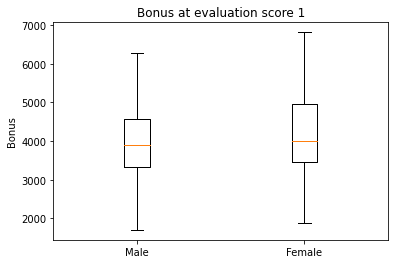

Ttest_indResult(statistic=-1.9579998371773197, pvalue=0.05164926413061376)


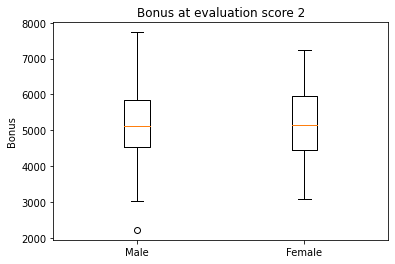

Ttest_indResult(statistic=-0.6489039757191044, pvalue=0.5171840132761996)


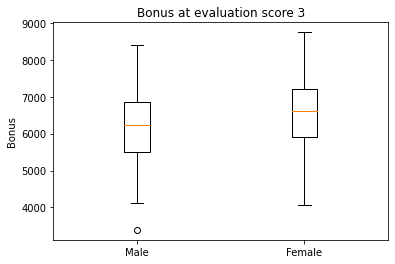

Ttest_indResult(statistic=-2.530116819136371, pvalue=0.01220559822439742)


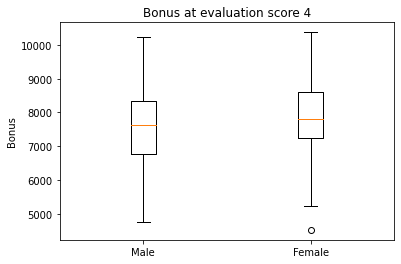

Ttest_indResult(statistic=-1.7262030023246993, pvalue=0.08581752313332015)


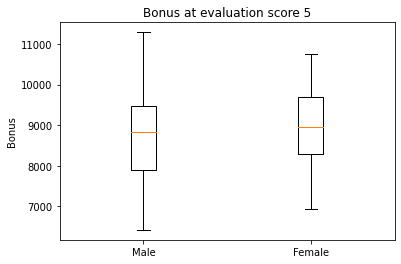

Ttest_indResult(statistic=-1.3113938241367429, pvalue=0.19117747140242344)


In [48]:
for k in range(1,6):
    df_gd_p=df_gd[df_gd['PerfEval']==k]
    df_gd_p_m=df_gd_p[df_gd_p['Gender']=='Male']
    df_gd_p_f=df_gd_p[df_gd_p['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_p_m['Bonus'], df_gd_p_f['Bonus']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Bonus at evaluation score {}".format(k))
    ax.set_ylabel('Bonus')
    plt.show()
    print(stats.ttest_ind(df_gd_p_m['Bonus'], df_gd_p_f['Bonus']))

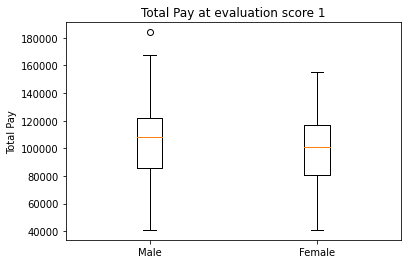

Ttest_indResult(statistic=1.8430798243493636, pvalue=0.06682752152123679)


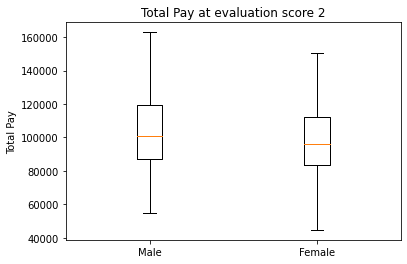

Ttest_indResult(statistic=1.7654549487875588, pvalue=0.07909362763117171)


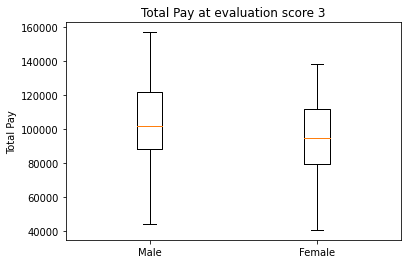

Ttest_indResult(statistic=2.8420294785495677, pvalue=0.00496718075435376)


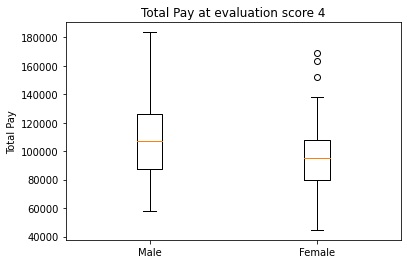

Ttest_indResult(statistic=3.3876609283885726, pvalue=0.0008451117051128816)


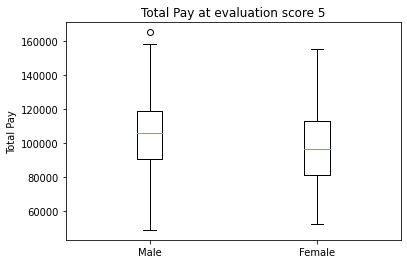

Ttest_indResult(statistic=2.2446356870754935, pvalue=0.025849413081632668)


In [49]:
for k in range(1,6):
    df_gd_p=df_gd[df_gd['PerfEval']==k]
    df_gd_p_m=df_gd_p[df_gd_p['Gender']=='Male']
    df_gd_p_f=df_gd_p[df_gd_p['Gender']=='Female']
    fig, ax = plt.subplots()
    ax.boxplot([df_gd_p_m['TotalPay'], df_gd_p_f['TotalPay']])
    ax.set_xticklabels(['Male', 'Female'])
    plt.title("Total Pay at evaluation score {}".format(k))
    ax.set_ylabel('Total Pay')
    plt.show()
    print(stats.ttest_ind(df_gd_p_m['TotalPay'], df_gd_p_f['TotalPay']))

In [50]:
# women earn significantly less compared to men when evaluated with higher scores, whereas there is no significant difference on the lower evaluation levels

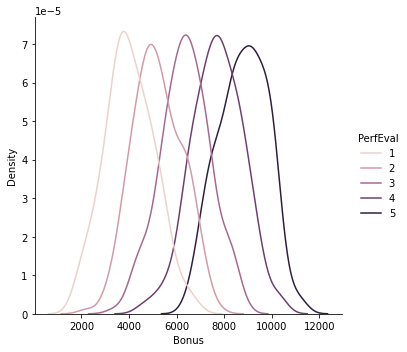

In [51]:
sns.displot(x='Bonus', data=df_gd, hue='PerfEval', kind='kde')

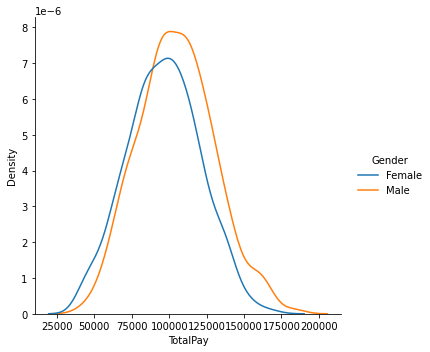

In [52]:

sns.displot(x='TotalPay', data=df_gd, hue='Gender', kind='kde')


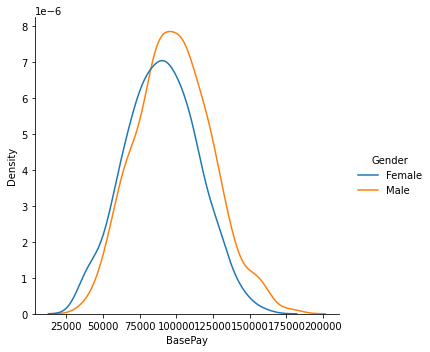

In [53]:
sns.displot(x='BasePay', data=df_gd, hue='Gender', kind='kde')

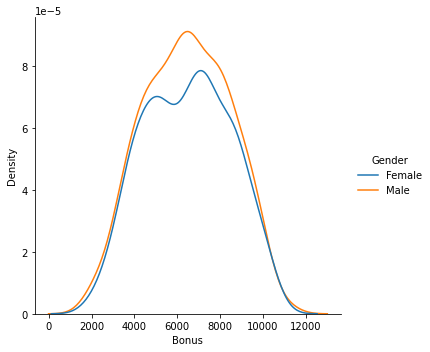

In [54]:
sns.displot(x='Bonus', data=df_gd, hue='Gender', kind='kde')

## Is there a significant difference in pay between males and females?

In [55]:
df_gd_male=df_gd[df_gd['Gender']=='Male']
df_gd_female=df_gd[df_gd['Gender']=='Female']
print(stats.ttest_ind(df_gd_male['BasePay'], df_gd_female['BasePay']))

Ttest_indResult(statistic=5.376104124176958, pvalue=9.478621943012633e-08)


In [56]:
print(stats.ttest_ind(df_gd_male['Bonus'], df_gd_female['Bonus']))

Ttest_indResult(statistic=-0.10133940723793167, pvalue=0.919301390176108)


In [57]:
print(stats.ttest_ind(df_gd_male['TotalPay'], df_gd_female['TotalPay']))

Ttest_indResult(statistic=5.407461816876623, pvalue=8.000016978237565e-08)


In [58]:
# there is a significant difference in pay between males and females in total and base pay but not in bonus.

In [59]:
df_gd.groupby('Seniority')["BasePay"].mean()

Seniority
1     76840.353846
2     84640.416268
3     94679.643836
4    104146.173913
5    113477.715026
Name: BasePay, dtype: float64

[[1.         0.99932837]
 [0.99932837 1.        ]]
   Seniority        BasePay
0          1   76840.353846
1          2   84640.416268
2          3   94679.643836
3          4  104146.173913
4          5  113477.715026


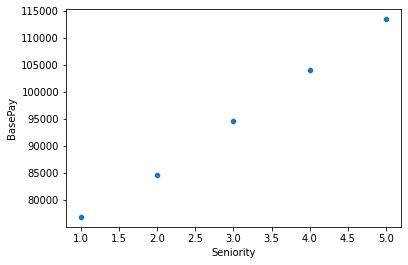

In [60]:
df_gd_base_sen=df_gd.groupby('Seniority')["BasePay"].mean()
df_gd_base_sen = df_gd_base_sen.reset_index(level=0)
sns.scatterplot(x='Seniority', y='BasePay', data=df_gd_base_sen)
print(np.corrcoef(df_gd_base_sen['Seniority'], df_gd_base_sen['BasePay']))
print(df_gd_base_sen)

In [ ]:
#nearly perfect corrleation between seniority and base pay

[[1.         0.97877251]
 [0.97877251 1.        ]]
   Seniority        Bonus
0          1  6030.041026
1          2  6093.349282
2          3  6393.584475
3          4  6809.032609
4          5  7071.170984


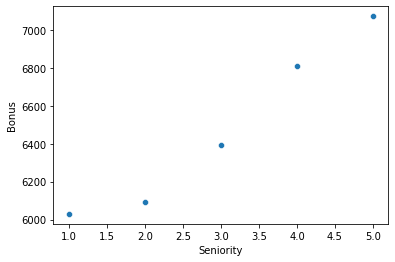

In [61]:
df_gd_bonus_sen=df_gd.groupby('Seniority')["Bonus"].mean()
df_gd_bonus_sen = df_gd_bonus_sen.reset_index(level=0)
sns.scatterplot(x='Seniority', y='Bonus', data=df_gd_bonus_sen)
print(np.corrcoef(df_gd_bonus_sen['Seniority'], df_gd_bonus_sen['Bonus']))
print(df_gd_bonus_sen)


In [ ]:
# good corrleation between bonus and seniority

[[ 1.         -0.77669403]
 [-0.77669403  1.        ]]
   PerfEval       BasePay
0         1  97078.631313
1         2  95339.661458
2         3  92596.793814
3         4  94942.420290
4         5  92483.301435


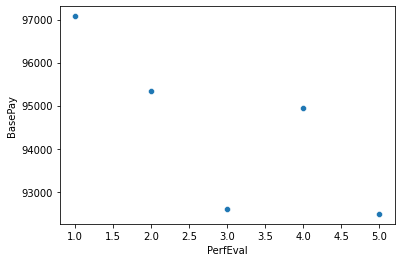

In [62]:
df_gd_base_eval=df_gd.groupby('PerfEval')["BasePay"].mean()
df_gd_base_eval = df_gd_base_eval.reset_index(level=0)
sns.scatterplot(x='PerfEval', y='BasePay', data=df_gd_base_eval)
print(np.corrcoef(df_gd_base_eval['PerfEval'], df_gd_base_eval['BasePay']))
print(df_gd_base_eval)

In [ ]:
# weak, negative corrleation between base pay and evaluation

[[1.         0.99958627]
 [0.99958627 1.        ]]
   PerfEval        Bonus
0         1  4034.207071
1         2  5194.703125
2         3  6371.438144
3         4  7712.053140
4         5  8796.894737


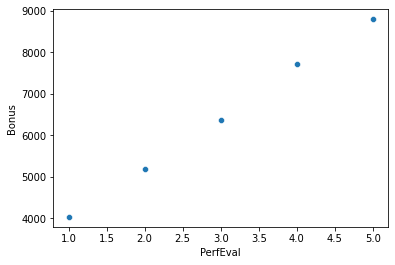

In [63]:
df_gd_bonus_eval=df_gd.groupby('PerfEval')["Bonus"].mean()
df_gd_bonus_eval = df_gd_bonus_eval.reset_index(level=0)
sns.scatterplot(x='PerfEval', y='Bonus', data=df_gd_bonus_eval)
print(np.corrcoef(df_gd_bonus_eval['PerfEval'], df_gd_bonus_eval['Bonus']))
print(df_gd_bonus_eval)

In [64]:
from statsmodels.formula.api import ols
data=df_gd_bonus_eval
x=df_gd_bonus_eval['PerfEval']
y=df_gd_bonus_eval['Bonus']
model = ols("y ~ x", data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3623.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.01e-05
Time:                        11:05:39   Log-Likelihood:                -26.554
No. Observations:                   5   AIC:                             57.11
Df Residuals:                       3   BIC:                             56.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2809.0416     66.354     42.334      0.0

C:\Users\Lara\AppData\Roaming\Python\Python310\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [65]:
from statsmodels.formula.api import ols
data=df_gd
x=df_gd['Age']
y=df_gd['BasePay']
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     462.4
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.41e-84
Time:                        11:05:39   Log-Likelihood:                -11368.
No. Observations:                1000   AIC:                         2.274e+04
Df Residuals:                     998   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.319e+04   2031.060     26.188      0.0

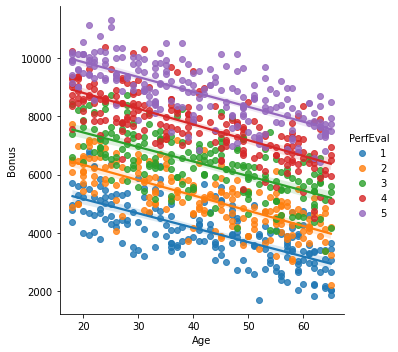

In [66]:
sns.lmplot(y='Bonus', x='Age', data=df_gd, hue='PerfEval') 

In [67]:
data1=df_gd[df_gd['PerfEval']==1]
x=data1['Age']
y=data1['Bonus']
model = ols("y ~ x", data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     182.9
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           7.14e-30
Time:                        11:05:40   Log-Likelihood:                -1590.2
No. Observations:                 198   AIC:                             3184.
Df Residuals:                     196   BIC:                             3191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6148.0970    165.087     37.242      0.0

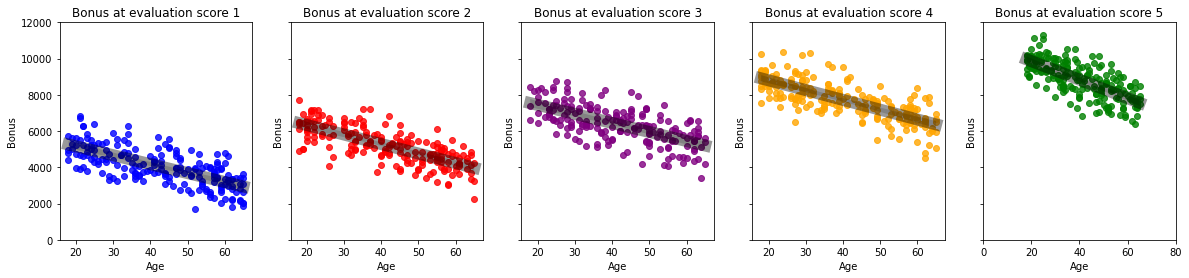

In [68]:
fig, axes = plt.subplots(1,5, figsize=(20,4), sharey=True)
plt.ylim(0,12000)
plt.xlim(0,80)
colors=['Blue', 'Red', 'Purple', 'Orange', 'Green']
for k, color in enumerate(colors):
    sns.regplot(y='Bonus', x='Age', data=df_gd[df_gd['PerfEval']==(k+1)], ax=axes[k], color=color, line_kws={"color":'black',"alpha":0.4,"lw":12}).set(title='Bonus at evaluation score {}'.format(k+1))

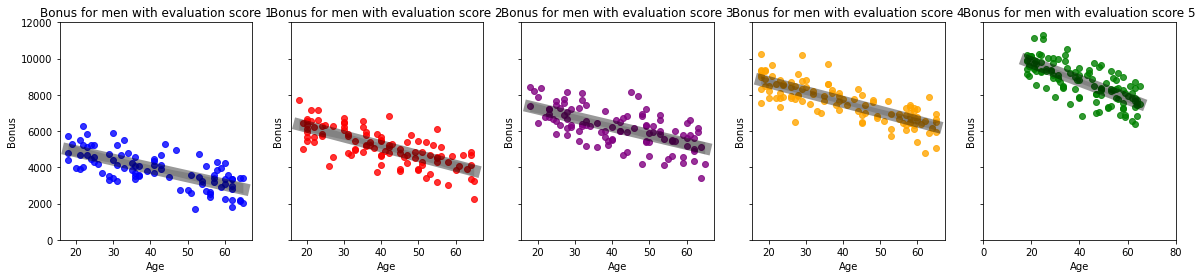

In [69]:
fig, axes = plt.subplots(1,5, figsize=(20,4), sharey=True)
plt.ylim(0,12000)
plt.xlim(0,80)
colors=['Blue', 'Red', 'Purple', 'Orange', 'Green']
for k, color in enumerate(colors):
    sns.regplot(y='Bonus', x='Age', data=df_gd_male[df_gd_male['PerfEval']==(k+1)], ax=axes[k], color=color, line_kws={"color":'black',"alpha":0.4,"lw":12}).set(title='Bonus for men with evaluation score {}'.format(k+1))

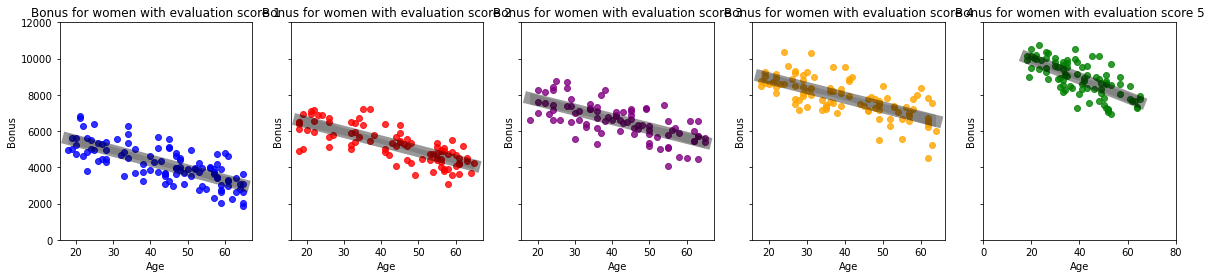

In [70]:
fig, axes = plt.subplots(1,5, figsize=(20,4), sharey=True)
plt.ylim(0,12000)
plt.xlim(0,80)
colors=['Blue', 'Red', 'Purple', 'Orange', 'Green']
for k, color in enumerate(colors):
    sns.regplot(y='Bonus', x='Age', data=df_gd_female[df_gd_female['PerfEval']==(k+1)], ax=axes[k], color=color, line_kws={"color":'black',"alpha":0.4,"lw":12}).set(title='Bonus for women with evaluation score {}'.format(k+1))

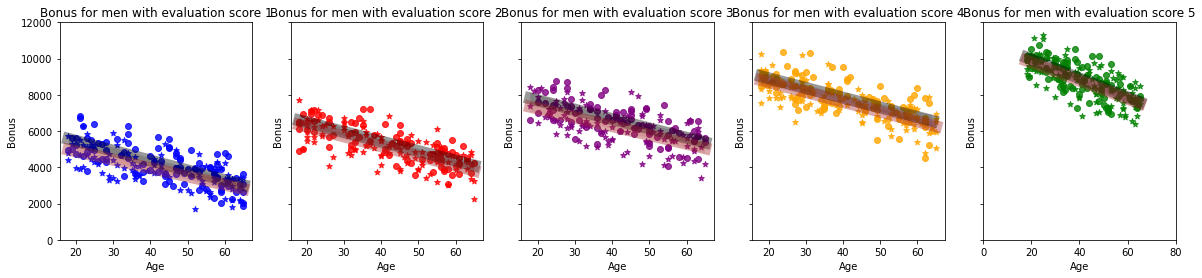

In [71]:
fig, axes = plt.subplots(1,5, figsize=(20,4), sharey=True)
plt.ylim(0,12000)
plt.xlim(0,80)
colors=['Blue', 'Red', 'Purple', 'Orange', 'Green']
for k, color in enumerate(colors):
    sns.regplot(y='Bonus', x='Age', data=df_gd_female[df_gd_female['PerfEval']==(k+1)], ax=axes[k], color=color, line_kws={"color":'black',"alpha":0.4,"lw":12}).set(title='Bonus for women with evaluation score {}'.format(k+1))
    sns.regplot(y='Bonus', x='Age', data=df_gd_male[df_gd_male['PerfEval']==(k+1)], ax=axes[k], color=color, line_kws={"color":'brown',"alpha":0.4,"lw":12}, marker='*').set(title='Bonus for men with evaluation score {}'.format(k+1))

In [72]:
for k in range(1,6):
    data1=df_gd[df_gd['PerfEval']==k]
    x=data1['Age']
    y=data1['Bonus']
    model = ols("y ~ x", data1).fit()
    print('Seniority level:', k)
    print(model.summary())
    print('')
    print('')

Seniority level: 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     182.9
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           7.14e-30
Time:                        11:05:44   Log-Likelihood:                -1590.2
No. Observations:                 198   AIC:                             3184.
Df Residuals:                     196   BIC:                             3191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6148.0970    165.087 

In [73]:
for k in range(1,6):
    data1=df_gd[df_gd['PerfEval']==k]
    x=data1['Age']
    y=data1['BasePay']
    model = ols("y ~ x", data1).fit()
    print('Seniority level:', k)
    print(model.summary())
    print('')
    print('')

Seniority level: 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     71.33
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           6.72e-15
Time:                        11:05:44   Log-Likelihood:                -2269.1
No. Observations:                 198   AIC:                             4542.
Df Residuals:                     196   BIC:                             4549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.636e+04   5092.203 

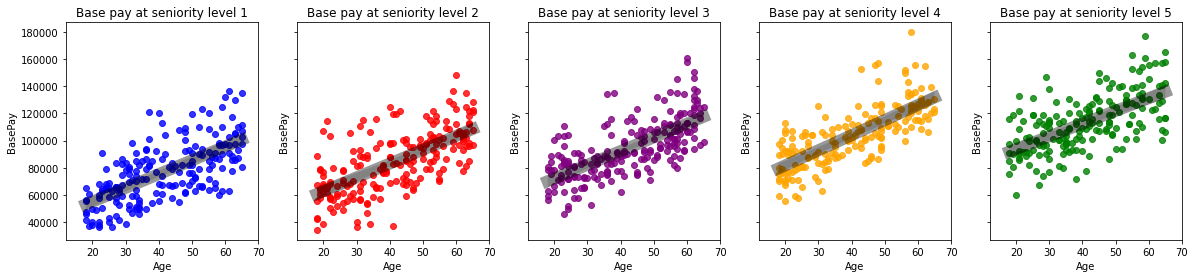

In [74]:
fig, axes = plt.subplots(1,5, figsize=(20,4), sharey=True, sharex=True)
plt.xlim(12,70)
colors=['Blue', 'Red', 'Purple', 'Orange', 'Green']
for k, color in enumerate(colors):
    sns.regplot(y='BasePay', x='Age', data=df_gd[df_gd['Seniority']==(k+1)], ax=axes[k], color=color, line_kws={"color":'black',"alpha":0.4,"lw":12}).set(title='Base pay at seniority level {}'.format(k+1))

In [75]:
from scipy import stats
model = ols('Bonus ~ PerfEval + Age', df_gd).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  Bonus   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     3223.
Date:                Fri, 08 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:05:45   Log-Likelihood:                -8016.4
No. Observations:                1000   AIC:                         1.604e+04
Df Residuals:                     997   BIC:                         1.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5028.4723     89.018     56.488      0.0

In [76]:
from scipy import stats
model = ols('BasePay ~ Seniority + Age', df_gd).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                BasePay   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     718.6
Date:                Fri, 08 Jul 2022   Prob (F-statistic):          5.66e-194
Time:                        11:05:45   Log-Likelihood:                -11112.
No. Observations:                1000   AIC:                         2.223e+04
Df Residuals:                     997   BIC:                         2.225e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.412e+04   1934.518     12.471      0.0